In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_pickle('./data/train_data_filtered.pkl')
test = pd.read_pickle('./data/test_data_filtered.pkl')
data = pd.concat((train, test))
data.shape

(116351, 204)

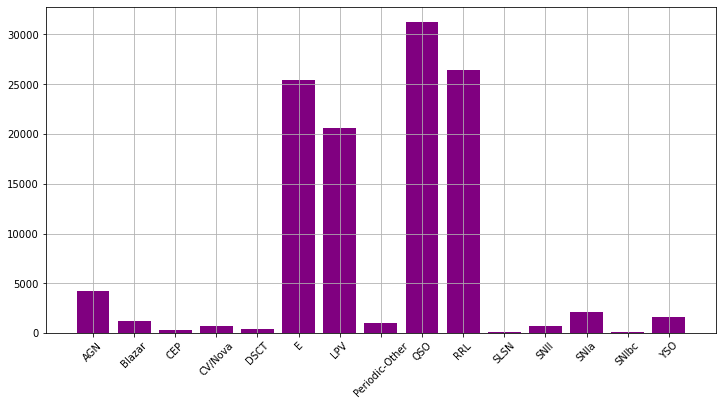

In [3]:
classes, counts = np.unique(data.classALeRCE, return_counts=True)

plt.figure(figsize=(12,6))
plt.grid()
plt.bar(classes, counts, color='purple')
plt.xticks(rotation=45)
plt.show()

In [9]:
hierClasses = ['Transient', 'Stochastic', 'Periodic']

for hierClass in hierClasses:
    if hierClass=='Transient':
        possible_outliers = ['SLSN',
                             'SNII',
                             'SNIa',
                             'SNIbc']
    elif hierClass == 'Stochastic':
        possible_outliers = [ 'AGN' ,
                             'Blazar',
                             'CV/Nova',
                             'QSO',
                             'YSO']
    elif hierClass == 'Periodic':
        possible_outliers = ['CEP',
                             'DSCT',
                             'E',
                             'RRL',
                             'LPV']
    for outlier in possible_outliers:
        train = pd.read_pickle('./data/train_data_filtered.pkl')
        test = pd.read_pickle('./data/test_data_filtered.pkl')
        print('##################')
        print('Outlier: {}'.format(outlier))
        
        train = train[train.hierClass==hierClass]
        test = test[test.hierClass==hierClass]
        
        #Remove the outlier from training set and append it to the test set.
        test = pd.concat([test, train[train.classALeRCE==outlier]], sort=False)
        print('Train size: {}'.format(train[train.classALeRCE!=outlier].shape[0]))
        print('Test size: {}'.format(test.shape[0]))
        print('Total outliers: {}'.format(test[test.classALeRCE==outlier].shape[0]))
        print('Proportion: {:.2f}'.format(test[test.classALeRCE==outlier].shape[0]/test.shape[0]))

##################
Outlier: SLSN
Train size: 2376
Test size: 652
Total outliers: 81
Proportion: 0.12
##################
Outlier: SNII
Train size: 1905
Test size: 1123
Total outliers: 667
Proportion: 0.59
##################
Outlier: SNIa
Train size: 720
Test size: 2308
Total outliers: 2136
Proportion: 0.93
##################
Outlier: SNIbc
Train size: 2322
Test size: 706
Total outliers: 144
Proportion: 0.20
##################
Outlier: AGN
Train size: 27754
Test size: 11273
Total outliers: 4266
Proportion: 0.38
##################
Outlier: Blazar
Train size: 30178
Test size: 8849
Total outliers: 1234
Proportion: 0.14
##################
Outlier: CV/Nova
Train size: 30620
Test size: 8407
Total outliers: 678
Proportion: 0.08
##################
Outlier: QSO
Train size: 6269
Test size: 32758
Total outliers: 31210
Proportion: 0.95
##################
Outlier: YSO
Train size: 29863
Test size: 9164
Total outliers: 1639
Proportion: 0.18
##################
Outlier: CEP
Train size: 59307
Test size: 1